### MidTerm Assignment: notebook 3: Learning to drive (Total: 15pts)

### Muhammad  Wajahat  Mirza 

### NetID: mwm356

#### Disclaimer: Code is split in this file as per the requirements of the sub-questions. 

In this notebook, we will use [the Keras API](https://keras.io/) to build and train a convolutional neural network to discriminate between four types of road signs. To simplify we will consider the detection of 4 different signs: 

- A '30 km/h' sign (folder 1)
- A 'Stop' sign 
- A 'Go straight' sign
- A 'Keep left' sign 

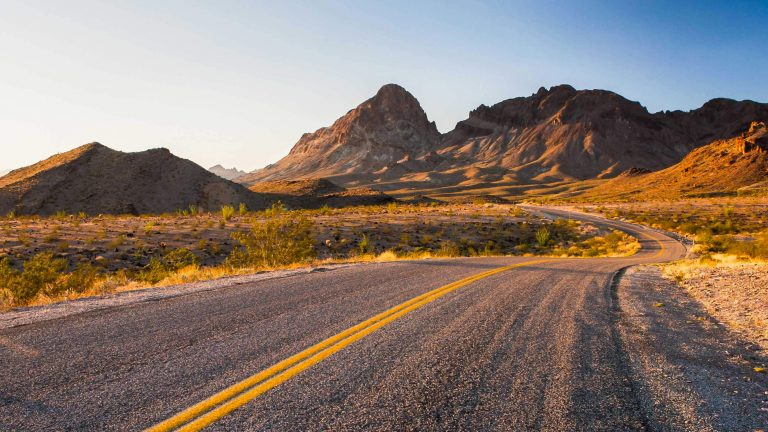

In [36]:
# <img src="learning2Drive.png" width="800" />
from IPython.display import Image
Image('learning2Drive.png')

#### Import Respective Libraries

In [19]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical
import os
from sklearn.model_selection import train_test_split
import numpy as np 
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import cv2
from keras import optimizers
import keras
import keras.utils
from keras.optimizers import SGD
import matplotlib.image as mpimg

#### An example of each sign is given below.

(65, 65, 3)
(73, 73, 3)
(73, 77, 3)
(193, 188, 3)


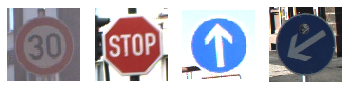

In [13]:
def show_example():
    img1 = mpimg.imread('1/00001_00000_00012.png')
    print(img1.shape)
    plt.subplot(141)
    plt.imshow(img1)
    plt.axis('off')

    plt.subplot(142)
    img2 = mpimg.imread('2/00014_00001_00019.png')
    plt.imshow(img2)
    plt.axis('off')
    print(img2.shape)
    plt.subplot(143)
    img3 = mpimg.imread('3/00035_00008_00023.png')
    plt.imshow(img3)
    plt.axis('off')
    print(img3.shape)
    plt.subplot(144)
    img4 = mpimg.imread('4/00039_00000_00029.png')
    plt.imshow(img4)
    plt.axis('off')
    print(img4.shape)
    plt.show()
show_example()

### Question 1 (10pts).  In this exercise, you need to build and train a convolutional neural network to discriminate between the four images.  

- Before building the network, you should start by cropping the images so that they all have a common predefined size (take the smallest size across all images) 

- We will use a __Sequential model__ from Keras but it will be up top you to define the structure of the convolution net. Initialization of the sequential model can be done with the following line 

model = Sequential()



## Solution

    1. Load Data 
    2. Split Data into (X_train, y_train), (X_test, y_test)
    3. Data Pre-processing on the Input 
    4. Data Pre-processing on the Output Column
    5. Build the Model: Input_layer + Other convolutional layers that needs to be addedd
    6. DO Pooling layers, Falttening, and Dense layer 
    7. Compile the model 
    8. Fit the Data 
    9. Output the Accuracy of the Model

### Solution: Loading Data 
    Images from all 4 folders

In [14]:
# ================================================================================
# Loading Images from 4 folders 
# ================================================================================

def load_images_from_folder():
    names = [1,2,3,4]
    images = []
    targets = []
    img_size = 30
    for i in names:
        # =========================================================
        # While running it on your machine, Change this directory.  
        # =========================================================
        folder = "/Users/mirza/Documents/Spring '20 - Paris/Machine Learning/Midterm/"+str(i)
        print("Loading images from: ",folder)
        
        for filename in os.listdir(folder):
            img = cv2.imread(os.path.join(folder,filename))
            if img is not None:
                img = cv2.resize(img,(img_size,img_size))
                images.append(img)
                targets.append(i)
    count = 0
    for i in images: 
        count+=1
    print("Total images loaded: ",count)
    return images, targets
images, targets = load_images_from_folder()

Loading images from:  /Users/mirza/Documents/Spring '20 - Paris/Machine Learning/Midterm/1
Loading images from:  /Users/mirza/Documents/Spring '20 - Paris/Machine Learning/Midterm/2
Loading images from:  /Users/mirza/Documents/Spring '20 - Paris/Machine Learning/Midterm/3
Loading images from:  /Users/mirza/Documents/Spring '20 - Paris/Machine Learning/Midterm/4
Total images loaded:  4500


## 1.a. Convolutions. 

- We will defintely use __convolutional layers__. you can add such layers to the model by using the lines 

        model.add(Conv2D(num_units, (filter_size1, filter_size2), padding='same',
                             input_shape=(3, IMG_SIZE, IMG_SIZE),
                             activation='relu'))
                     
for the first layer and                     

        model.add(Conv2D(filters, filter_size, activation, input_shape)

for all the others. 'filters' indicate the number of filters you want to use in the convolutional layer. filter_size is the size of each filter and activation is the usual activation that comes on top of the convolution, i.e.
$x_{\text{out}} = \sigma(\text{filter}*\text{input})$. Finally input_shape indicates the size of your input. Note that only the input layer should be given the input size. Subsequent layers will automatically compute the size of their inputs based on previous layers. 

## Solution
### Split Data into Train and Test
#### Images loaded in above function are split into Train and Test sub data sets

In [15]:
# ================================================================================
# Split Data 
# ================================================================================

def dataset_split(X,t): 
   
    X_train, X_test, y_train, y_test = train_test_split(X, t, train_size=0.90,test_size=0.10, random_state=101)
    
    c = 0
    for i in y_train: 
        c+=1
        
    d = 0
    for j in y_test: 
        d+=1

    X_train = np.asarray(X_train)
    X_test = np.asarray(X_test)
    print("Training Set: {} \nTest Set: {} \nTotal Data: {}".format(c,d, c+d))
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = dataset_split(images, targets)

Training Set: 4050 
Test Set: 450 
Total Data: 4500


In [16]:
# ================================================================================
# Verify
# ================================================================================

# print(X_train[2])
print(X_train[2].shape)

(30, 30, 3)


In [17]:
# ================================================================================
# Verify
# ================================================================================

print(y_train[:30])

[1, 3, 2, 3, 2, 3, 3, 1, 3, 1, 2, 2, 3, 1, 1, 1, 1, 2, 1, 1, 3, 1, 1, 1, 3, 1, 3, 3, 3, 2]


### Solution
### Data Pre-processing on Input and Output Vectors: 
#### A.    Reshape the size of all images to fit the Model
#### B.    Categorize the Target Column --> "one-hot-encode" 

In [20]:
# ================================================================================
#reshape data to fit model
# ================================================================================

def pre_processing(X_train, X_test, y_train, y_test):
    
    num_of_images_X_train = 3375   
    num_of_images_X_test = 1125
    img_size = 30  
    image_grayscale = 1

#     X_train = X_train.reshape((num_of_images_X_train, img_size, img_size, image_grayscale))
#     X_test = X_test.reshape((num_of_images_X_test, img_size, img_size, image_grayscale))

    X_train = tf.keras.utils.normalize(X_train)
    X_test = tf.keras.utils.normalize(X_test)
    
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = pre_processing(X_train, X_test, y_train, y_test)

In [21]:
# ================================================================================
# Verify Data Pre-Processing
# ================================================================================

print(X_train[2].shape)
print(y_train[2])

(30, 30, 3)
[0. 0. 1. 0. 0.]


## Solution
### Buidling Model 
                    model.add(Conv2D(num_units, (filter_size1, filter_size2), padding='same',
                             input_shape=(3, IMG_SIZE, IMG_SIZE),
                             activation='relu'))
         __Description__
                    num_units = num of nodes in each layer
                    filter_size = filter matrix of our convolution i.e. kernel_size
                    input_shape = size of the image
                    activation = activation function being used
                    
[Documentation](https://keras.io/layers/convolutional/) For this model

In [22]:
# ================================================================================
# Model Building
# ================================================================================
model = Sequential()

img_size = 30
image_grayscale= 3

num_units = 100
num_units_later = num_units//2
filter_size = (3, 3)

# # Add input Layer
model.add(Conv2D(num_units, kernel_size=(3,3), activation='relu', input_shape=(img_size,img_size,image_grayscale)))


# # Add second layer
model.add(Conv2D(num_units_later, kernel_size=(3,3), activation='relu'))

# Adding a Pool Layer
model.add(MaxPooling2D(pool_size=filter_size, strides=None, padding='valid', data_format=None))

# # Add third layer but with lesser units
model.add(Conv2D(num_units_later, kernel_size=3, activation='relu'))

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 100)       2800      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 50)        45050     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 50)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 6, 6, 50)          22550     
Total params: 70,400
Trainable params: 70,400
Non-trainable params: 0
_________________________________________________________________


## 1.b Pooling Layers 


On top of the convolutional layers, convolutional neural networks (CNN) also often rely on __Pooling layers__. The addition of such a  layer can be done through the following line 

        model.add(MaxPooling2D(pool_size=(filter_sz1, filter_sz2)))

The _pooling layers_ usually come with two parameters: the 'pool size' and the 'stride' parameter. The basic choice for the pool size is (2,2) and the stride is usually set to None (which means it will split the image into non overlapping regions such as in the Figure below). You should however feel free to play a little with those parameters. The __MaxPool operator__ considers a mask of size pool_size which is slided over the image by a number of pixels equal to the stride parameters (in x and y, there are hence two translation parameters). for each position of the mask, the output only retains the max of the pixels appearing in the mask (This idea is illustrated below). One way to understand the effect of the pooling operator is that if the filter detects an edge in a subregion of the image (thus returning at least one large value), although a MaxPooling will reduce the number of parameters, it will keep track of this information.    

Adding 'Maxpooling' layers is known to work well in practice. 

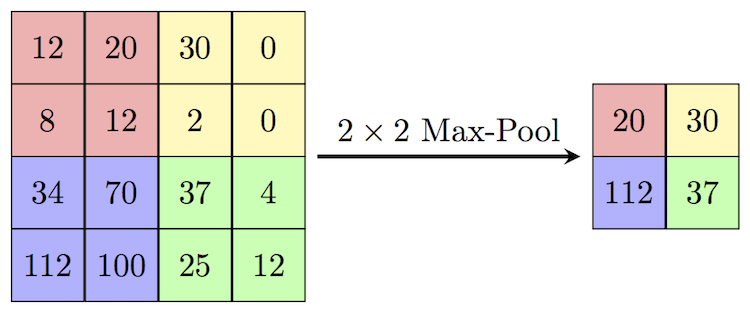

In [38]:
#<img src="Maxpool.png" width=600/> 
Image('Maxpool.png')

Although it is a little bit up to you to decide how you want to structure the network, a good start is to add a couple (definitely not exceeding 4) combinations (convolution, convolution, Pooling) with increasing number of units (you do every power of two like 16, 32, 128,...). 

## Solution
### Pooling Layer

In [23]:
# ================================================================================
# Add Pool Layer 
# ================================================================================

model.add(MaxPooling2D(pool_size=(3,3), strides=None, padding='valid', data_format=None))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 100)       2800      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 50)        45050     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 50)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 6, 6, 50)          22550     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 50)          0         
Total params: 70,400
Trainable params: 70,400
Non-trainable params: 0
_________________________________________________________________


## 1.c. Flattening and Fully connected layers

Once you have stacked the convolutional and pooling layers, you should flatten the output through a line of the form

        model.add(Flatten())

And add a couple (no need to put more than 2,3) dense fully connected layers through lines of the form

        model.add(Dense(num_units, activation='relu'))

## Solution: Flattening and Densing
    1. Flatten serves as a connection between the convolution and dense layers
    2. ‘Dense’ is the layer type we will use in for our output layer

In [24]:
# ================================================================================
# Flattening and Densing
# ================================================================================

model.add(Flatten())
model.add(Dense(num_units, activation= 'relu'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 100)       2800      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 50)        45050     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 50)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 6, 6, 50)          22550     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 50)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)              

## 1.d. Concluding 

Since there are four possible signs, you need to __finish your network with a dense layer with 4 units__. Each of those units should output four number between 0 and 1 representing the likelihood that any of the four sign is detected and such that $p_1 + p_2 + p_3 + p_4 = 1$ (hopefully with one probability much larger than the others). For this reason, a good choice for the __final activation function__ of those four units is the __softmax__ (Why?). 


### Solution

__WHY Softmax?__ 

      1. Softmax is sort of Multi Class Sigmoid where the sum of all softmax units is 1. Increasing the output 
      value of one class makes the the others go down (sigma=1)
      
      2. At the final layer of a neural network, the model produces its final activations (a.k.a. logits), which 
         we would like to be able to interpret as probabilities, as that would allow is to e.g. create a 
         classification result
         
      3. the reason for using the softmax is to ensure these logits all sum up to 1, thereby fulfilling the 
         constraints of a probability density

In [25]:
# ================================================================================
# Softmax Densing
# ================================================================================

num_outputs = 5
model.add(Dense(num_outputs, activation='softmax'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 100)       2800      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 50)        45050     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 50)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 6, 6, 50)          22550     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 50)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)              

### Question 2 (3pts). Setting up the optimizer

Once you found a good architecture for your network, split the dataset, by retaining about 90% of the images for training and 10% of each folder for test. To train your network in Keras, we need two more steps. The first step is to set up the optimizer. Here again it is a little bit up to you to decide how you want to set up the optimization. Two popular approaches are __SGD and ADAM__. You will get to choose the learning rate. This rate should however be between 1e-3 and 1e-2. Once you have set up the optimizer, we need to set up the optimization parameters. This includes the loss (we will take it to be the __categorical cross entropy__ which is the extension of the log loss to the multiclass problem).

## Solution

1. "Split the Dataset" part of the Question has been done in function above: $dataset-split(X,t)$
2. The following Compiles the model with Optimizer as either SGD or ADAM with learning rate = $e^{-3}$


In [26]:
# ================================================================================
# Compiler 
# ================================================================================

batch_size = 32
epochs = 3

SGD = keras.optimizers.SGD(learning_rate=0.01, momentum=0.0, nesterov=False)
Adam = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)

Myoptimizer = [SGD, Adam]

# ================================================================================
# Change the Index of Myoptimizer to use a different Optimizer
# ================================================================================
model.compile(loss='categorical_crossentropy',optimizer=Myoptimizer[1], metrics=['accuracy'])


### Question 3 (2pts). Optimization

The last step is to fit the network to your data. Just as any other function in scikit-learn, we use a call to the function 'fit'. The training of neural networks can be done by splitting the dataset into minibatches and using a different batch at each SGD step. This process is repeated over the whole dataset. A complete screening of the dataset is called an epoch. We can then repeat this idea several times. In keras the number of epochs is stored in the 'epochs' parameter and the batch size is stored in the 'batch_size'.   

## Solution

1. Model compiled is fit to the training data set with validated against the test data set
2. Accuracy of the Model is graphed below 
3. Accuracy of the test dataset is also calculated

In [27]:
# ================================================================================
# Model Fit 
# ================================================================================

history = model.fit(X_train, y_train, batch_size=32, validation_data=(X_test, y_test), epochs=epochs)

# ================================================================================
# Test Dataset is Evaluated 
# ================================================================================
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)
print("Accuracy of Test Dataset: {} i.e. {} %".format(test_acc, test_acc*100))


Train on 4050 samples, validate on 450 samples
Epoch 1/3
4050/4050 [==============================] - 29s 7ms/step - loss: 0.3711 - accuracy: 0.8625 - val_loss: 0.0718 - val_accuracy: 0.9867
Epoch 2/3
4050/4050 [==============================] - 27s 7ms/step - loss: 0.0454 - accuracy: 0.9849 - val_loss: 0.0180 - val_accuracy: 0.9978
Epoch 3/3
4050/4050 [==============================] - 27s 7ms/step - loss: 0.0147 - accuracy: 0.9958 - val_loss: 0.0137 - val_accuracy: 0.9933
Accuracy of Test Dataset: 0.9933333396911621 i.e. 99.33333396911621 %


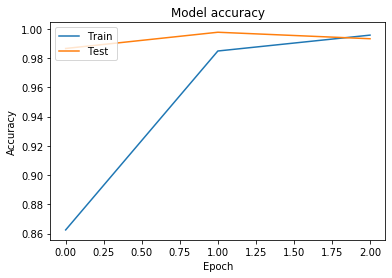

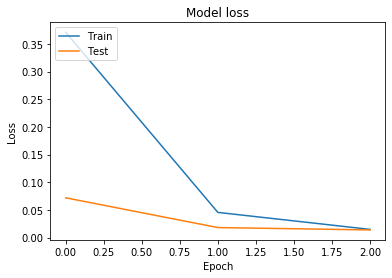

In [28]:
# ================================================================================
# Graph Accuracy 
# ================================================================================

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [29]:
# Verify
print(y_test[2])

# Predict
pred = model.predict(X_test)
print(pred[2])
pred[2].sum()


[0. 0. 1. 0. 0.]
[7.3136114e-10 4.4054681e-04 9.9955946e-01 7.9996845e-09 5.8797794e-10]


1.0

## Solution All-together: 
#### This following Cells Contains Same Code but at one Place to make better sense

In [31]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical
import os
from sklearn.model_selection import train_test_split
import numpy as np 
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam

# ============================= Load Data ===================================================

# Loading Images from 4 folders 
def load_images_from_folder():
    names = [1,2,3,4]
    img_size = 30
    images = []
    targets = []
    for i in names:
        # =========================================================
        # While running it on your machine, Change this directory.  
        # =========================================================
        folder = "/Users/mirza/Documents/Spring '20 - Paris/Machine Learning/Midterm/"+str(i)
        print("Loading images from: ",folder)
        
        for filename in os.listdir(folder):
            img = cv2.imread(os.path.join(folder,filename))
            if img is not None:
                img = cv2.resize(img,(img_size,img_size))
                images.append(img)
                targets.append(i)
    count = 0
    for i in images: 
        count+=1
    print("Total images loaded: ",count)
    return images, targets
images, targets = load_images_from_folder()

# ============================= Train_Test_Split ===================================================

def dataset_split(X,t): 
   
    X_train, X_test, y_train, y_test = train_test_split(X, t, train_size=0.90,test_size=0.10, random_state=101)
    
    c = 0
    for i in y_train: 
        c+=1
        
    d = 0
    for j in y_test: 
        d+=1

    X_train = np.asarray(X_train)
    X_test = np.asarray(X_test)
    print("Training Set: {} \nTest Set: {} \nTotal Data: {}".format(c,d, c+d))
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = dataset_split(images, targets)

# ============================= Data Pre-Processing ===================================================
#reshape data to fit model
def pre_processing(X_train, X_test, y_train, y_test):

#     X_train = X_train.reshape((num_of_images_X_train, img_size, img_size, image_grayscale))
#     X_test = X_test.reshape((num_of_images_X_test, img_size, img_size, image_grayscale))
    X_train = tf.keras.utils.normalize(X_train)
    X_test = tf.keras.utils.normalize(X_test)
    
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = pre_processing(X_train, X_test, y_train, y_test)


Loading images from:  /Users/mirza/Documents/Spring '20 - Paris/Machine Learning/Midterm/1
Loading images from:  /Users/mirza/Documents/Spring '20 - Paris/Machine Learning/Midterm/2
Loading images from:  /Users/mirza/Documents/Spring '20 - Paris/Machine Learning/Midterm/3
Loading images from:  /Users/mirza/Documents/Spring '20 - Paris/Machine Learning/Midterm/4
Total images loaded:  4500
Training Set: 4050 
Test Set: 450 
Total Data: 4500


In [32]:

# ============================= Model Building ===================================================
model = Sequential()

img_size = 30
image_grayscale= 3

num_units = 100
num_units_later = num_units//2
filter_size = (3, 3)

# # Add input Layer
model.add(Conv2D(num_units, kernel_size=(3,3), activation='relu', input_shape=(img_size,img_size,image_grayscale)))

model.add(MaxPooling2D(pool_size=filter_size, strides=None, padding='valid', data_format=None))

# # Add second layer
model.add(Conv2D(num_units_later, kernel_size=(3,3), activation='relu'))

# model.add(MaxPooling2D(pool_size=filter_size, strides=None, padding='valid', data_format=None))

# # Add third layer but with lesser units
# model.add(Conv2D(num_units_later, kernel_size=2, activation='relu'))

model.add(MaxPooling2D(pool_size=(3,3), strides=None, padding='valid', data_format=None))

model.add(Flatten())
# model.add(Dense(num_units, activation= 'relu'))
model.add(Dense(num_units_later, activation='relu'))

num_outputs = 5
model.add(Dense(num_outputs, activation='softmax'))

model.summary()



Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 100)       2800      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 9, 9, 100)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 50)          45050     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 2, 2, 50)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 200)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 50)                10050     
_________________________________________________________________
dense_4 (Dense)              (None, 5)                

### Used SGD Optimizer unlike above model

Train on 4050 samples, validate on 450 samples
Epoch 1/3
4050/4050 [==============================] - 23s 6ms/step - loss: 1.2478 - accuracy: 0.4965 - val_loss: 1.0328 - val_accuracy: 0.4822
Epoch 2/3
4050/4050 [==============================] - 22s 6ms/step - loss: 0.8559 - accuracy: 0.6936 - val_loss: 0.6123 - val_accuracy: 0.8556
Epoch 3/3
4050/4050 [==============================] - 22s 6ms/step - loss: 0.4783 - accuracy: 0.8795 - val_loss: 0.3607 - val_accuracy: 0.9000
Accuracy of Test Dataset: 0.8999999761581421 i.e. 89.99999761581421 %


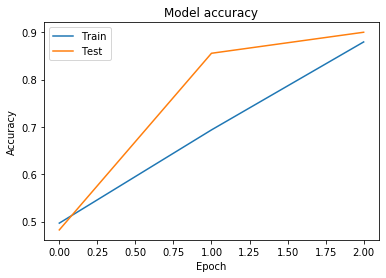

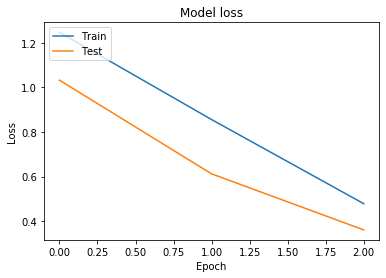

In [33]:

# ============================= Compiler ===================================================

batch_size = 100
epochs = 3

SGD = keras.optimizers.SGD(learning_rate=0.01, momentum=0.0, nesterov=False)
Adam = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
Myoptimizer = [SGD, Adam]

model.compile(loss='categorical_crossentropy',optimizer=Myoptimizer[0], metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=32, validation_data=(X_test, y_test), epochs=epochs)

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)
print("Accuracy of Test Dataset: {} i.e. {} %".format(test_acc, test_acc*100))
# ================================================================================
# Graph Accuracy 
# ================================================================================

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [34]:
# Verify
print(y_test[2])

# Predict
pred = model.predict(X_test)
print(pred[2])
pred[2].sum()

[0. 0. 1. 0. 0.]
[5.3129585e-05 3.4639250e-02 9.6361095e-01 7.5610733e-05 1.6210735e-03]


1.0000001

### If there is any issue, rerun the cells or clear the outputs of the cell before running them 
## First Model is with ADAM Optimizer. Second Model is with SDG Optimizer
# End of Code 